In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/AI project/AI_Cognitive_Burnout_Dataset_8000_Rows.csv")

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:")
print(df.head())


Shape of dataset: (8000, 10)

Columns:
 Index(['Study_Hours', 'Sleep_Hours', 'Screen_Time_Hours', 'Exercise_Hours',
       'Stress_Level', 'Previous_Marks', 'Burnout_Score', 'Burnout_Level',
       'Performance_Decline', 'Final_Predicted_Marks'],
      dtype='object')

First 5 rows:
   Study_Hours  Sleep_Hours  Screen_Time_Hours  Exercise_Hours  Stress_Level  \
0         5.99         6.95               7.20            0.46             7   
1         4.72         6.24               5.10            0.43             4   
2         6.30         6.74               2.72            2.14             4   
3         8.05         8.07               3.84            2.49             6   
4         4.53         8.92               5.86            0.26             3   

   Previous_Marks  Burnout_Score Burnout_Level  Performance_Decline  \
0           59.69           4.21        Medium                 0.62   
1           60.55           1.61           Low                 1.43   
2           80.14     

In [3]:
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nBasic statistics:\n", df.describe())




Missing values:
 Study_Hours              0
Sleep_Hours              0
Screen_Time_Hours        0
Exercise_Hours           0
Stress_Level             0
Previous_Marks           0
Burnout_Score            0
Burnout_Level            0
Performance_Decline      0
Final_Predicted_Marks    0
dtype: int64

Data types:
 Study_Hours              float64
Sleep_Hours              float64
Screen_Time_Hours        float64
Exercise_Hours           float64
Stress_Level               int64
Previous_Marks           float64
Burnout_Score            float64
Burnout_Level             object
Performance_Decline      float64
Final_Predicted_Marks    float64
dtype: object

Basic statistics:
        Study_Hours  Sleep_Hours  Screen_Time_Hours  Exercise_Hours  \
count  8000.000000  8000.000000        8000.000000     8000.000000   
mean      4.997221     6.999985           5.025159        1.034826   
std       2.001830     1.460653           2.435662        0.725341   
min       0.000000     3.000000          

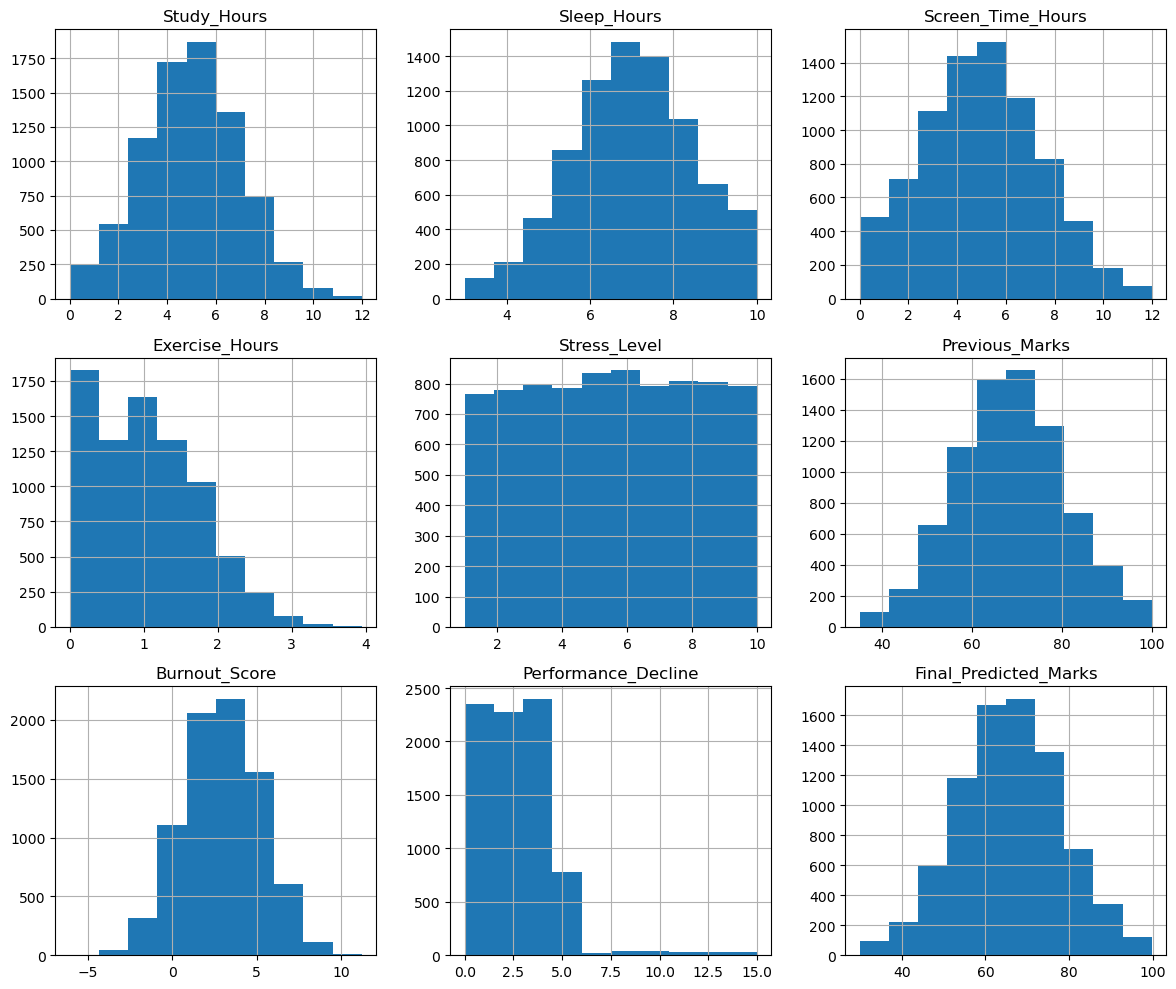

In [4]:
#TO create histogram
import matplotlib.pyplot as plt

df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

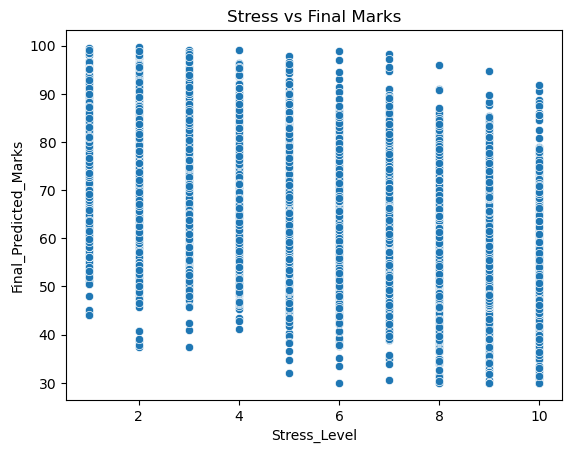

In [5]:
#Scatter plot
#Stress vs Final Marks
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Stress_Level", y="Final_Predicted_Marks", data=df)
plt.title("Stress vs Final Marks")
plt.show()


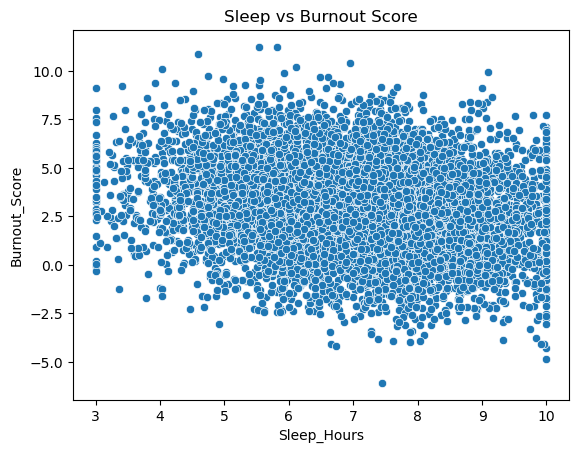

In [6]:
#Sleep vs Burnout score
sns.scatterplot(x="Sleep_Hours", y="Burnout_Score", data=df)
plt.title("Sleep vs Burnout Score")
plt.show()


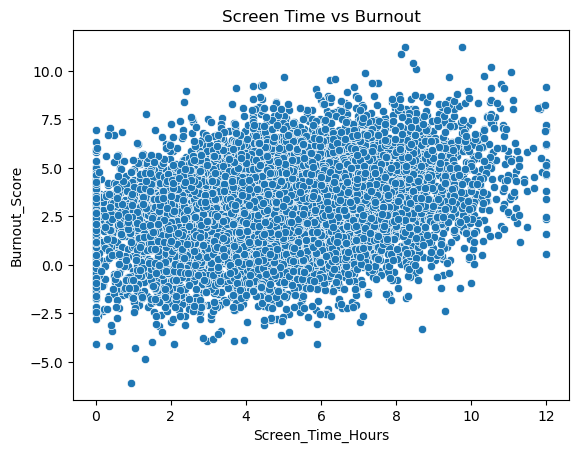

In [7]:
#Screen Time vs Burnout Score
sns.scatterplot(x="Screen_Time_Hours", y="Burnout_Score", data=df)
plt.title("Screen Time vs Burnout")
plt.show()

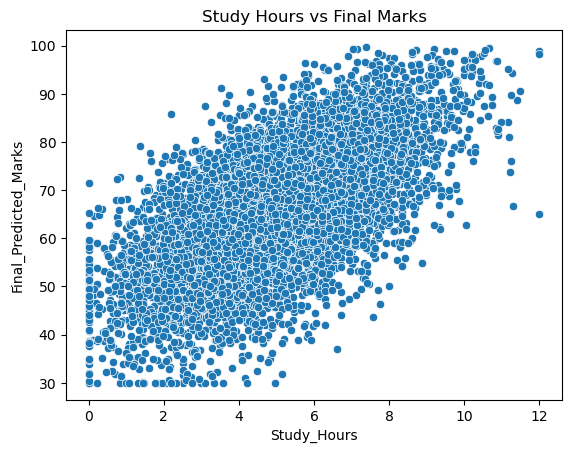

In [8]:
#Study Hours vs Final Marks
sns.scatterplot(x="Study_Hours", y="Final_Predicted_Marks", data=df)
plt.title("Study Hours vs Final Marks")
plt.show()

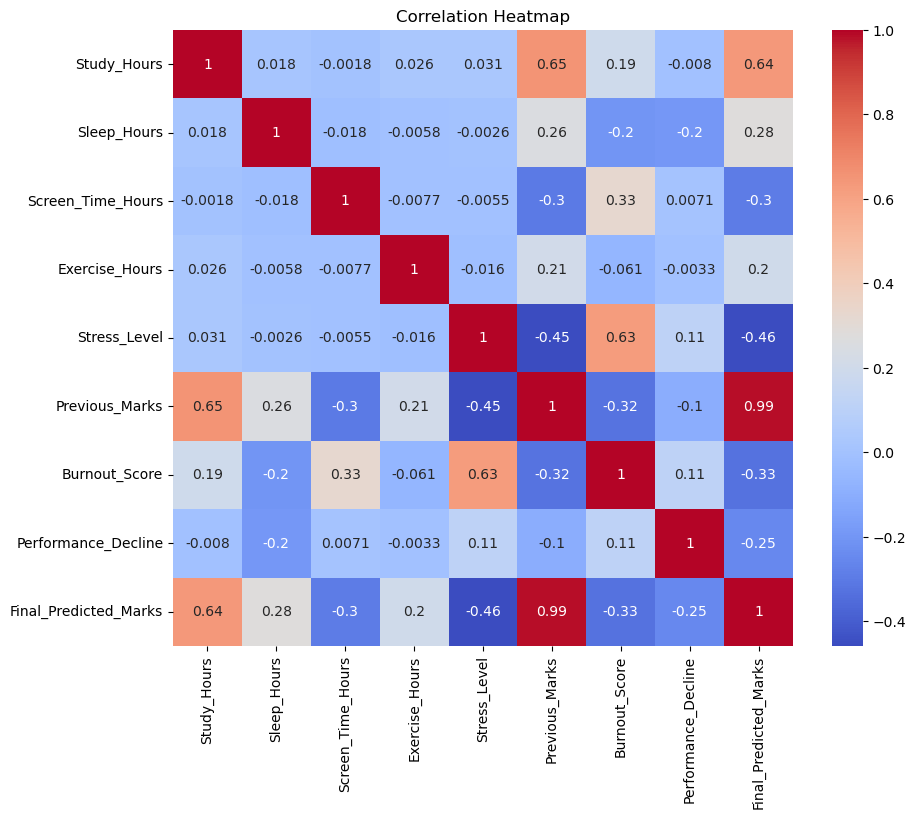

In [9]:
#CORRELATION HEATMAP
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

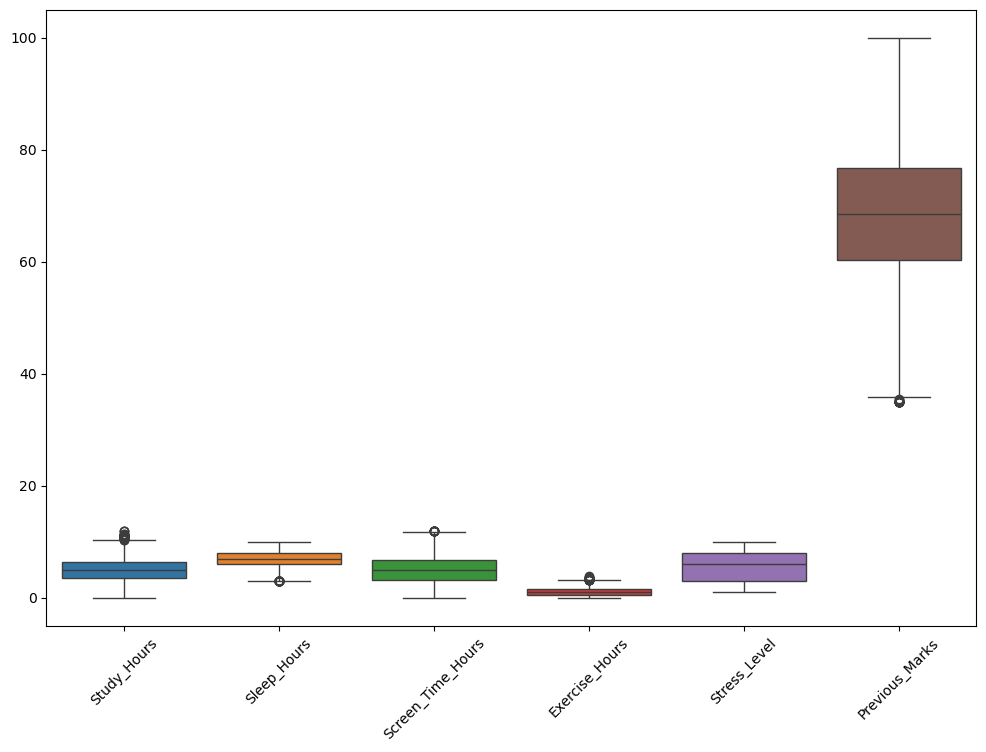

In [10]:
#OUTLIER TREATMENT
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(data=df[[
    "Study_Hours",
    "Sleep_Hours",
    "Screen_Time_Hours",
    "Exercise_Hours",
    "Stress_Level",
    "Previous_Marks"
]])
plt.xticks(rotation=45)
plt.show()


In [11]:
#IQR Method
import numpy as np

df_clean = df.copy()

columns_to_check = [
    "Study_Hours",
    "Sleep_Hours",
    "Screen_Time_Hours",
    "Exercise_Hours",
    "Previous_Marks"
]

for col in columns_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df_clean[
        (df_clean[col] >= lower_bound) &
        (df_clean[col] <= upper_bound)
    ]

print("Original Shape:", df.shape)
print("New Shape After Outlier Removal:", df_clean.shape)


Original Shape: (8000, 10)
New Shape After Outlier Removal: (7863, 10)


In [12]:
#FEATURE SELECTION
df_model = df_clean.drop(columns=["Burnout_Score", "Performance_Decline"])
print(df_model.columns)


Index(['Study_Hours', 'Sleep_Hours', 'Screen_Time_Hours', 'Exercise_Hours',
       'Stress_Level', 'Previous_Marks', 'Burnout_Level',
       'Final_Predicted_Marks'],
      dtype='object')


In [18]:
#BURNOUT PREDICTION
X_class = df_model[[
    "Study_Hours",
    "Sleep_Hours",
    "Screen_Time_Hours",
    "Exercise_Hours",
    "Stress_Level",
    "Previous_Marks"
]]

y_class = df_model["Burnout_Level"]

print("X_class shape:", X_class.shape)
print("y_class shape:", y_class.shape)



X_class shape: (7863, 6)
y_class shape: (7863,)


In [19]:
#MARKS PREDICTION
X_reg = X_class.copy()
y_reg = df_model["Final_Predicted_Marks"]

print("X_reg shape:", X_reg.shape)
print("y_reg shape:", y_reg.shape)



X_reg shape: (7863, 6)
y_reg shape: (7863,)


In [20]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

print("Classes:", le.classes_)
print("First 10 encoded values:", y_class_encoded[:10])


Classes: ['High' 'Low' 'Medium']
First 10 encoded values: [2 1 1 0 1 2 2 2 0 2]


In [21]:
# TRAINING AND TESTING
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class,
    y_class_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_class_encoded  # important for balanced class split
)

print("Training shape:", X_train_c.shape)
print("Testing shape:", X_test_c.shape)


Training shape: (6290, 6)
Testing shape: (1573, 6)


In [22]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled testing shape:", X_test_scaled.shape)


Scaled training shape: (6290, 6)
Scaled testing shape: (1573, 6)


In [17]:
#TRAIN LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
log_model = LogisticRegression(max_iter=1000)

# Train
log_model.fit(X_train_scaled, y_train_c)

# Predict
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test_c, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_log))


Accuracy: 0.6611570247933884

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.49      0.57       307
           1       0.75      0.76      0.76       635
           2       0.57      0.64      0.60       631

    accuracy                           0.66      1573
   macro avg       0.67      0.63      0.64      1573
weighted avg       0.67      0.66      0.66      1573


Confusion Matrix:
 [[151   3 153]
 [  2 485 148]
 [ 69 158 404]]


In [18]:
df_model["Burnout_Level"].value_counts()


Burnout_Level
Low       3173
Medium    3153
High      1537
Name: count, dtype: int64

In [24]:
#NAIVE BAYES
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train_scaled, y_train_c)

y_pred_nb = nb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_c, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_nb))


Accuracy: 0.6503496503496503

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56       307
           1       0.73      0.79      0.76       635
           2       0.57      0.58      0.58       631

    accuracy                           0.65      1573
   macro avg       0.64      0.63      0.63      1573
weighted avg       0.65      0.65      0.65      1573


Confusion Matrix:
 [[155   7 145]
 [  6 499 130]
 [ 87 175 369]]


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(X_train_scaled, y_train_c)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_c, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_rf))


Accuracy: 0.6369993642720916

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.49      0.55       307
           1       0.72      0.76      0.74       635
           2       0.56      0.58      0.57       631

    accuracy                           0.64      1573
   macro avg       0.64      0.61      0.62      1573
weighted avg       0.64      0.64      0.63      1573


Confusion Matrix:
 [[151   9 147]
 [  8 483 144]
 [ 80 183 368]]


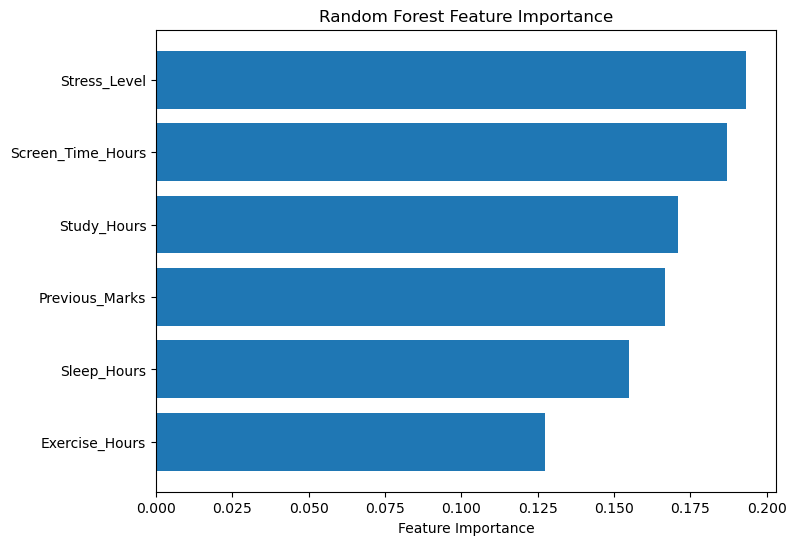

In [26]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
feature_names = X_class.columns

sorted_idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, y_train_c)

print("Best Parameters:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_scaled)

print("Tuned Accuracy:", accuracy_score(y_test_c, y_pred_best_rf))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Accuracy: 0.6478067387158296


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_scaled, y_train_c)

y_pred_gb = gb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_c, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_gb))


Accuracy: 0.6484424666242848

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.48      0.55       307
           1       0.74      0.75      0.75       635
           2       0.56      0.62      0.59       631

    accuracy                           0.65      1573
   macro avg       0.65      0.62      0.63      1573
weighted avg       0.65      0.65      0.65      1573



In [29]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [30]:
#ANN
#One-Hot Encode Target
from tensorflow.keras.utils import to_categorical

y_train_ann = to_categorical(y_train_c, num_classes=3)
y_test_ann = to_categorical(y_test_c, num_classes=3)

print("y_train shape:", y_train_ann.shape)
print("y_test shape:", y_test_ann.shape)


y_train shape: (6290, 3)
y_test shape: (1573, 3)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build model
ann_model = Sequential()

ann_model.add(Dense(64, activation='relu', input_shape=(6,)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))

# Compile
ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627 (10.26 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#TO TRAIN ANN
history = ann_model.fit(
    X_train_scaled,
    y_train_ann,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5956 - loss: 0.8459 - val_accuracy: 0.6288 - val_loss: 0.7635
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6365 - loss: 0.7602 - val_accuracy: 0.6407 - val_loss: 0.7546
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6439 - loss: 0.7538 - val_accuracy: 0.6439 - val_loss: 0.7537
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6451 - loss: 0.7483 - val_accuracy: 0.6542 - val_loss: 0.7551
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6459 - loss: 0.7457 - val_accuracy: 0.6447 - val_loss: 0.7551
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6467 - loss: 0.7431 - val_accuracy: 0.6502 - val_loss: 0.7470
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6494 - loss: 0.7421 - val_accuracy: 0.6502 - val_loss: 0.7486
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6483 - loss: 0.7405 - val_accuracy: 0.

In [33]:
test_loss, test_accuracy = ann_model.evaluate(X_test_scaled, y_test_ann)

print("Test Accuracy:", test_accuracy)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6440 - loss: 0.7380
Test Accuracy: 0.6439923644065857


In [34]:
X_reg = X_class.copy()
y_reg = df_model["Final_Predicted_Marks"]


In [35]:
#TRAIN TEST SPLIT (REGRESSION)
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)

print("Training shape:", X_train_r.shape)
print("Testing shape:", X_test_r.shape)


Training shape: (6290, 6)
Testing shape: (1573, 6)


In [37]:
#FEATURE SCALING(REGRESSION)
from sklearn.preprocessing import StandardScaler

scaler_r = StandardScaler()

X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

print("Scaled training shape:", X_train_r_scaled.shape)
print("Scaled testing shape:", X_test_r_scaled.shape)



Scaled training shape: (6290, 6)
Scaled testing shape: (1573, 6)


In [38]:
#LINEAR REGRESSION (BASELINE MODEL)
#FOR LINEAR MODEL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize
lin_reg = LinearRegression()

# Train
lin_reg.fit(X_train_r_scaled, y_train_r)

# Predict
y_pred_lin = lin_reg.predict(X_test_r_scaled)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_lin))
mae = mean_absolute_error(y_test_r, y_pred_lin)
r2 = r2_score(y_test_r, y_pred_lin)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


RMSE: 1.7602681207397184
MAE: 1.3825688113227856
R2 Score: 0.979118831149654


In [39]:
#FOR NON LINEAR MODEL
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)

rf_reg.fit(X_train_r_scaled, y_train_r)

y_pred_rf_reg = rf_reg.predict(X_test_r_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test_r, y_pred_rf_reg))
mae_rf = mean_absolute_error(y_test_r, y_pred_rf_reg)
r2_rf = r2_score(y_test_r, y_pred_rf_reg)

print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)


RMSE: 1.58743509855769
MAE: 1.316182835346471
R2 Score: 0.9830179891308174


In [40]:
#ANN FOR REGRESSION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_reg = Sequential()

ann_reg.add(Dense(64, activation='relu', input_shape=(6,)))
ann_reg.add(Dense(32, activation='relu'))
ann_reg.add(Dense(1, activation='linear'))

ann_reg.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

ann_reg.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#TO TRAIN ANN REGRESSOR
history_reg = ann_reg.fit(
    X_train_r_scaled,
    y_train_r,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3177.7234 - mae: 53.9159 - val_loss: 786.1790 - val_mae: 26.1522
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 249.8913 - mae: 12.8337 - val_loss: 142.8453 - val_mae: 9.7500
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 121.4219 - mae: 8.8752 - val_loss: 97.3347 - val_mae: 8.0835
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89.1981 - mae: 7.6284 - val_loss: 72.1782 - val_mae: 6.9223
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 65.5163 - mae: 6.5369 - val_loss: 52.2145 - val_mae: 5.8717
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 46.2376 - mae: 5.4596 - val_loss: 36.4299 - val_mae: 4.8689
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 31.2842 - mae: 4.4704 - val_loss: 24.5878 - val_mae: 3.9331
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.6828 - mae: 3.5965 - val_loss: 16.5180 - val_mae: 3.1750
Epoch 9/50
158/158 ━━━━━━━━━━━━

In [42]:
test_loss_reg, test_mae_reg = ann_reg.evaluate(X_test_r_scaled, y_test_r)

print("Test MAE:", test_mae_reg)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6636 - mae: 1.3536
Test MAE: 1.3536206483840942


In [ ]:
# --------- Classification Model ---------
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_c)


# --------- Regression Model ---------
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_r_scaled, y_train_r)


In [ ]:
import joblib

# Save classification model
joblib.dump(log_model, "burnout_classifier.pkl")

# Save regression model
joblib.dump(rf_reg, "performance_regressor.pkl")

# Save scalers
joblib.dump(scaler, "scaler_classification.pkl")
joblib.dump(scaler_r, "scaler_regression.pkl")

print("Models and scalers saved successfully.")


In [1]:
import joblib
import numpy as np

# Load models
burnout_model = joblib.load("burnout_classifier.pkl")
performance_model = joblib.load("performance_regressor.pkl")

scaler_class = joblib.load("scaler_classification.pkl")
scaler_reg = joblib.load("scaler_regression.pkl")

print("Models loaded successfully.")


Models loaded successfully.


In [2]:
#TO CREATE PREDICTION MODEL
def predict_student_status(study, sleep, screen, exercise, stress, previous_marks):
    
    # Create input array
    input_data = np.array([[study, sleep, screen, exercise, stress, previous_marks]])
    
    # Scale for classification
    input_scaled_class = scaler_class.transform(input_data)
    
    # Scale for regression
    input_scaled_reg = scaler_reg.transform(input_data)
    
    # Burnout Prediction
    burnout_pred = burnout_model.predict(input_scaled_class)[0]
    burnout_prob = burnout_model.predict_proba(input_scaled_class)[0]
    
    # Map numeric back to label
    class_mapping = {0: "High", 1: "Low", 2: "Medium"}
    burnout_label = class_mapping[burnout_pred]
    
    # Performance Prediction
    predicted_marks = performance_model.predict(input_scaled_reg)[0]
    
    # ---------------- RECOMMENDATION ENGINE ---------------- #
    
    recommendations = []
    
    if sleep < 6:
        recommendations.append("Increase sleep to at least 7–8 hours.")
        
    if stress > 7:
        recommendations.append("Practice stress reduction techniques like meditation.")
        
    if screen > 7:
        recommendations.append("Reduce screen time and follow 20-20-20 rule.")
        
    if exercise < 0.5:
        recommendations.append("Include at least 30 minutes of daily physical activity.")
        
    if burnout_label == "High":
        recommendations.append("Take a short academic break and focus on recovery.")
    
    if not recommendations:
        recommendations.append("Your lifestyle looks balanced. Keep it up!")
    
    # Return structured result
    return {
        "Burnout_Level": burnout_label,
        "Burnout_Probabilities": {
            "High": burnout_prob[0],
            "Low": burnout_prob[1],
            "Medium": burnout_prob[2]
        },
        "Predicted_Final_Marks": round(predicted_marks, 2),
        "Recommendations": recommendations
    }


In [3]:
#TEST PREDICTION SYSTEM
result = predict_student_status(
    study=4,
    sleep=5,
    screen=8,
    exercise=0.2,
    stress=9,
    previous_marks=70
)

print(result)


{'Burnout_Level': 'High', 'Burnout_Probabilities': {'High': np.float64(0.830800246244868), 'Low': np.float64(0.005130342273390795), 'Medium': np.float64(0.16406941148174117)}, 'Predicted_Final_Marks': np.float64(66.71), 'Recommendations': ['Increase sleep to at least 7–8 hours.', 'Practice stress reduction techniques like meditation.', 'Reduce screen time and follow 20-20-20 rule.', 'Include at least 30 minutes of daily physical activity.', 'Take a short academic break and focus on recovery.']}


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
#TO EXTRACT COEFFICIENTS
import joblib

log_model = joblib.load("burnout_classifier.pkl")

import pandas as pd

feature_names = [
    "Study_Hours",
    "Sleep_Hours",
    "Screen_Time_Hours",
    "Exercise_Hours",
    "Stress_Level",
    "Previous_Marks"
]

coefficients = pd.DataFrame(
    log_model.coef_,
    columns=feature_names,
    index=["High", "Low", "Medium"]
)

coefficients


,Study_Hours,Sleep_Hours,Screen_Time_Hours,Exercise_Hours,Stress_Level,Previous_Marks
High,0.273049,-0.439888,0.721942,-0.140469,1.400666,0.102463
Low,-0.378439,0.427356,-0.726114,0.109189,-1.397208,-0.010757
Medium,0.105390,0.012532,0.004172,0.031279,-0.003458,-0.091705


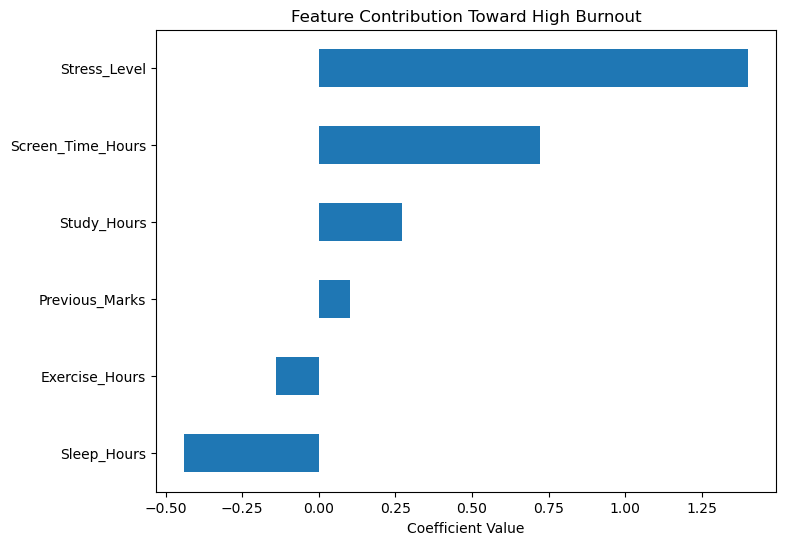

In [6]:
import matplotlib.pyplot as plt

high_coeff = coefficients.loc["High"]

high_coeff.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Contribution Toward High Burnout")
plt.xlabel("Coefficient Value")
plt.show()


In [7]:
#Add Personalized Contribution Score
def explain_individual_burnout(study, sleep, screen, exercise, stress, previous_marks):
    
    input_values = np.array([study, sleep, screen, exercise, stress, previous_marks])
    
    # Get High class coefficients
    high_coefs = log_model.coef_[0]  # index 0 = High
    
    contributions = input_values * high_coefs
    
    explanation = pd.Series(
        contributions,
        index=[
            "Study_Hours",
            "Sleep_Hours",
            "Screen_Time_Hours",
            "Exercise_Hours",
            "Stress_Level",
            "Previous_Marks"
        ]
    )
    
    return explanation.sort_values()



In [8]:
explain_individual_burnout(4, 5, 8, 0.2, 9, 70)


Sleep_Hours          -2.199440
Exercise_Hours       -0.028094
Study_Hours           1.092197
Screen_Time_Hours     5.775535
Previous_Marks        7.172375
Stress_Level         12.605991
dtype: float64

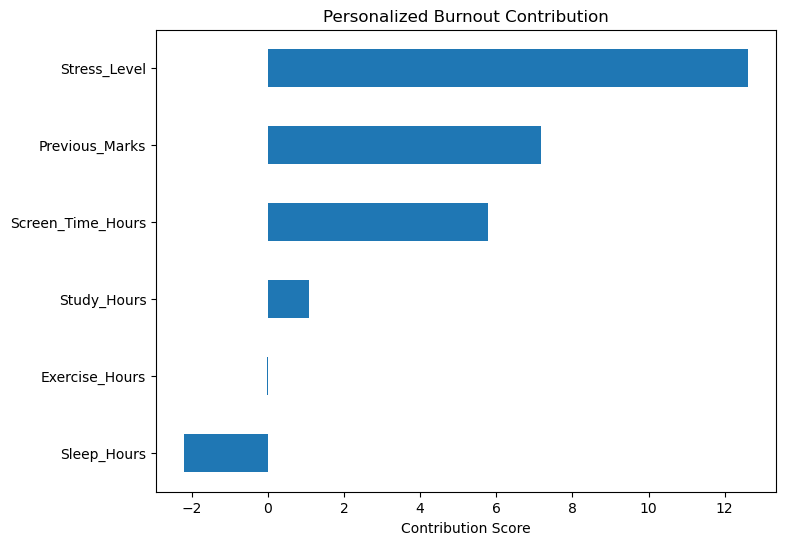

In [9]:
explanation = explain_individual_burnout(4, 5, 8, 0.2, 9, 70)

explanation.plot(kind='barh', figsize=(8,6))
plt.title("Personalized Burnout Contribution")
plt.xlabel("Contribution Score")
plt.show()
